# [Damex tutorial]

Implements the DAMEX algorithm described in [1].
The considered unsupervised task is to discover the groups of components of a random vector which are comparatively likely to be simultaneously large. 

[1] Goix, N., Sabourin, A., & Clémençon, S. (2017). Sparse representation of multivariate extremes with applications to anomaly detection. Journal of Multivariate Analysis, 161, 12-31.

In [4]:
# # Set working directory if necessary
import os
os.getcwd()
##os.chdir("../")

'/home/anne/Dropbox/RECHERCHE/CODE/MLExtreme'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import MLExtreme as mlx
# import pdb

# Define the norm function as the infinite norm.
def norm_func(X):
    return np.max(X, axis=1)

##Generate data

In [6]:
# Mu = np.array([
#     [1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1],
#     [1, 1, 0, 0, 0],
#     [0, 0, 0, 1, 1],
#     [1, 1, 1, 1, 1]
# ])

n = 10000
Mu = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 1],
    ]) 
k = np.shape(Mu)[0]
d = np.shape(Mu)[1]
wei = np.ones(k)/k
Mu, wei = mlx.normalize_param_dirimix(Mu, wei)
print(f'Mu matrix: \n {np.round(Mu, 3)}')
print(f'Weights: {np.round(wei,3)}' )
lnu = np.log(30/np.max(Mu, axis=1)) 
alpha = 2
Mu_bulk = np.ones((k, d))/d
np.random.seed(42)
X = mlx.gen_rv_dirimix(alpha, np.round(Mu,3),  wei, lnu,
                       scale_weight_noise=0, Mu_bulk=Mu_bulk,
                       index_weight_noise=alpha/2, size=n)

Mu matrix: 
 [[1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.333 0.667]]
Weights: [0.333 0.167 0.5  ]


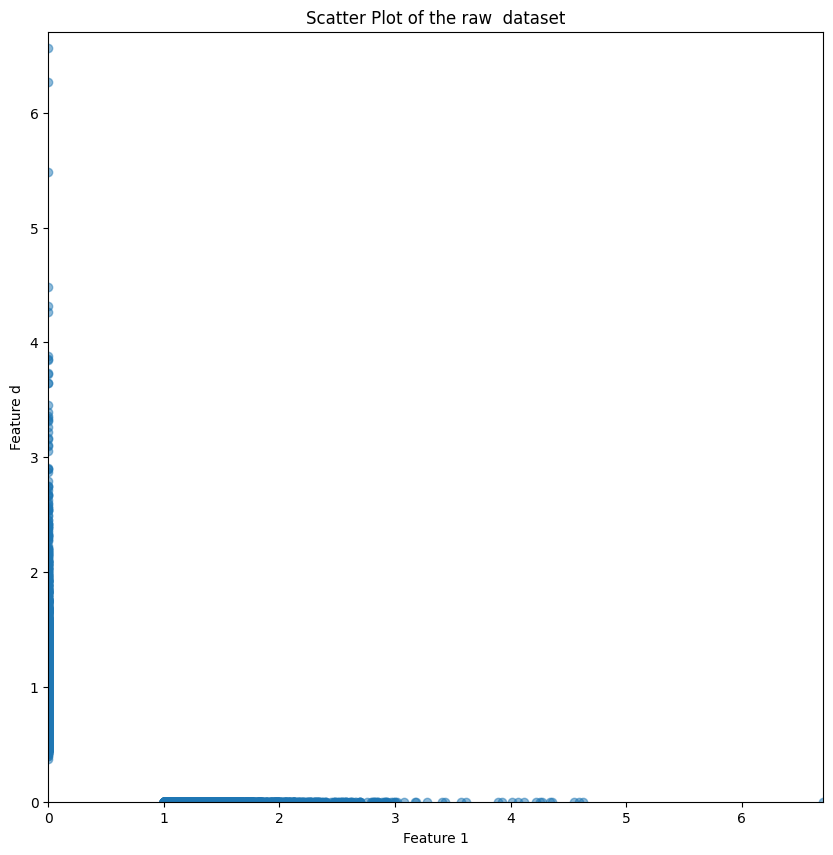

In [7]:
plt.figure(figsize=(10, 10))
X_disp = X**(1/alpha)  # for easier viz only 
max_val = np.max(X_disp)
scatter = plt.scatter(X_disp[:, 0], X_disp[:, 1], alpha=0.5)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.xlabel('Feature 1')
plt.ylabel('Feature d')
plt.title('Scatter Plot of the raw  dataset')
plt.show()

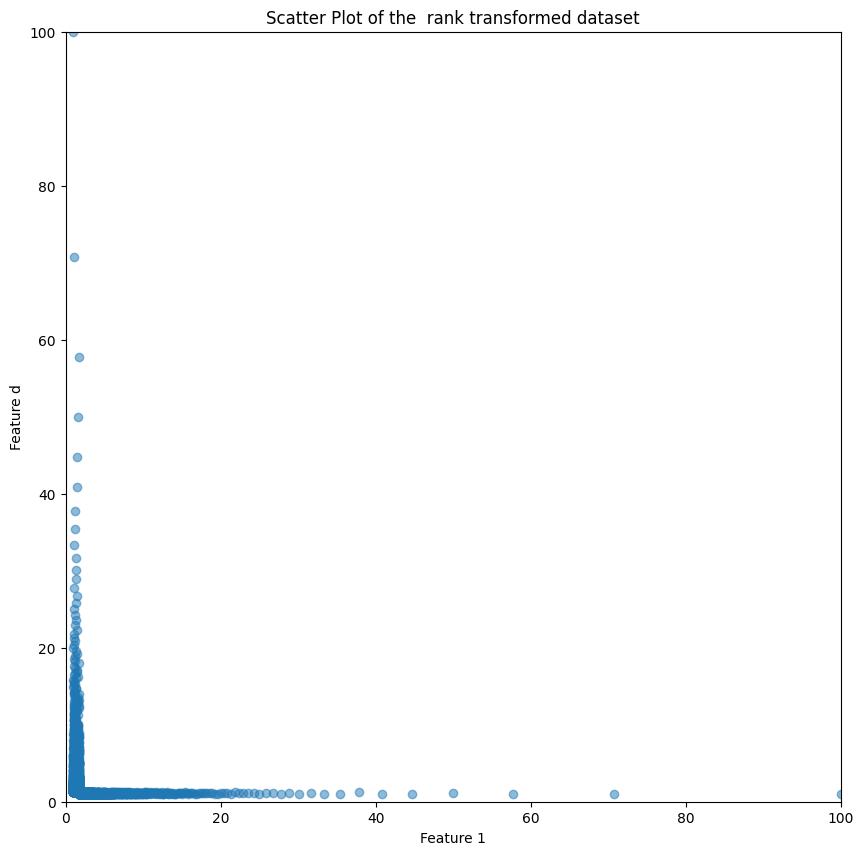

In [8]:
# and visualization
Xt = mlx.rank_transform(X)
plt.figure(figsize=(10, 10))
X_disp = Xt**(1/alpha)  # for easier viz only
max_val = np.max(X_disp)
scatter = plt.scatter(X_disp[:, 0], X_disp[:, 1], alpha=0.5)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.xlabel('Feature 1')
plt.ylabel('Feature d')
plt.title('Scatter Plot of the  rank transformed dataset')
plt.show()

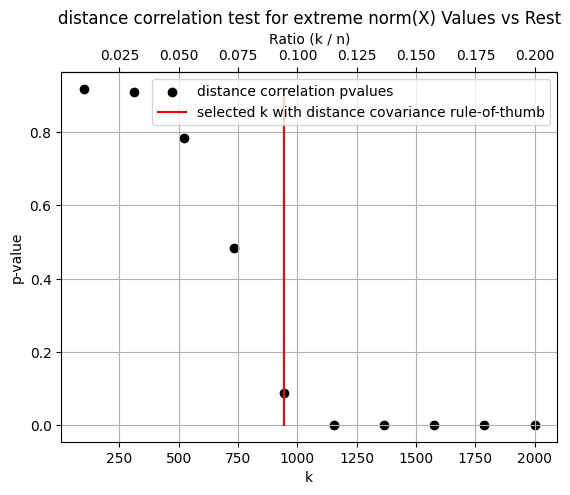

maximum ratio of extreme samples from rule-of-thumb distance covariance test: 0.094


In [9]:
# selecting the radial threshold 
ratio_ext = np.linspace(0.01, 0.2, num=10)
pval, ratio_max = mlx.test_indep_radius_rest(Xt, y=None, ratio_ext=ratio_ext,
                                             norm_func=norm_func)
mlx.plot_indep_radius_rest(pval, ratio_ext, ratio_max, n)

print(f'maximum ratio of extreme samples from rule-of-thumb \
distance covariance test: {mlx.round_signif(ratio_max, 2)}')

 ## Threshold selection 

In [10]:
# setting radial threshold for selection of extreme samples: 
ratio_extremes = ratio_max / 2
norm_Xt = norm_func(Xt)
threshold = np.quantile(norm_Xt, 1 - ratio_extremes) # radial threshold
# Beware the following is not 'k' from . it is comprised between k and d * k. 
number_extremes = np.sum(norm_Xt >= threshold)
# damex 'distance to subface' tolerance parameter:
epsilon = 0.1  
# min number of  samples per retained face / number of extremes:
min_ratio_per_subface = 0.005 
min_counts = int(min_ratio_per_subface * number_extremes)

Visualization of rank-transformed data and thresholds

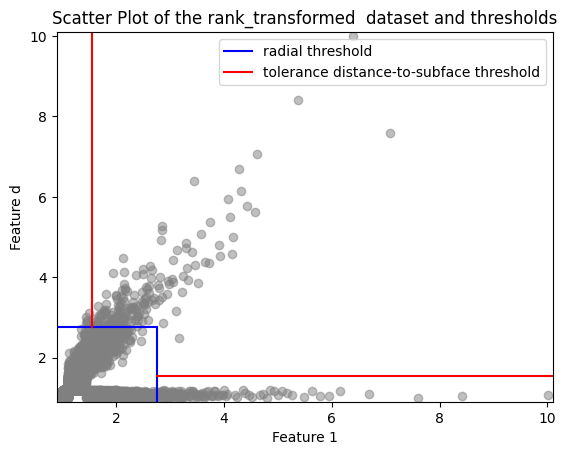



List of subfaces found by DAMEX:
[[np.int64(0)], [np.int64(1), np.int64(2)], [np.int64(1)], [np.int64(2)]]
Associated limit mass:
[1.0001     0.97119538 0.73417746 0.03468555]


In [11]:
Xt_disp = Xt**(1/4)
thresh_disp = threshold**(1/4)
eps_thresh_disp = (epsilon * threshold)**(1/4)
# NB: exponent alpha/4 above is meant to help visualization only. may
# be removed.
max_val = np.max(Xt_disp)*1.01
scatter = plt.scatter(Xt_disp[:, 1], Xt_disp[:, 2], alpha=0.5, c='gray')
plt.xlim(0.9, max_val)
plt.ylim(0.9, max_val)
plt.plot([thresh_disp, thresh_disp], [0, thresh_disp], c='blue',
         label='radial threshold')
plt.plot([0, thresh_disp], [thresh_disp, thresh_disp], c='blue')
plt.plot([thresh_disp, max_val], [eps_thresh_disp, eps_thresh_disp], c='red',
         label='tolerance distance-to-subface threshold')
plt.plot([eps_thresh_disp, eps_thresh_disp], [thresh_disp, max_val], c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature d')
plt.title('Scatter Plot of the rank_transformed  dataset and thresholds')
plt.legend()
plt.show()

faces, mass = mlx.damex(X, threshold, epsilon, min_counts=min_counts,
                        standardize=True)
print("\n")
print("List of subfaces found by DAMEX:")
pp.pprint(faces)
print("Associated limit mass:")
print(mass)

In [12]:
# true subfaces
true_bin_array = 1*(np.round(Mu, 3) > 0)
faces0, counts0 = mlx.damex_0(true_bin_array)

print("True faces:")
print(true_bin_array)
pp.pprint(faces0)

True faces:
[[1 0 0]
 [0 1 0]
 [0 1 1]]
[[np.int64(1), np.int64(2)], [np.int64(1)], [np.int64(0)]]
